In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sn

In [2]:
csv_file1 = "C:/Users/rodri/Desktop/NCFS2/ML/project/data/demographics.csv"
demos = pd.read_csv(csv_file1,sep=',',encoding='latin-1')

csv_file2 = "C:/Users/rodri/Desktop/NCFS2/ML/project/data/transactions.csv"
trans = pd.read_csv(csv_file2,sep=',',encoding='latin-1')

# Looking At Demographics

In [3]:
demos.head()

,customer_id,cust_main_branch,branch_loc_X,branch_loc_Y,cust_home_loc_X,cust_home_loc_Y,cust_work_loc_X,cust_work_loc_Y,cust_income_bracket,cust_age,...,may_very_late,may_extremely_late,may_followup,missed_payment_jun_ .,jun_none,jun_little_late,jun_late,jun_very_late,jun_extremely_late,jun_followup
0,25139695,2,36.991388,35.325423,36.971366,35.362328,41.029810,29.152450,2500.0,55,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21213035,2,36.991388,35.325423,37.010670,35.369540,41.070440,28.989410,2500.0,24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,21242221,2,36.991388,35.325423,40.920454,29.187872,36.995320,35.274170,1200.0,26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23187800,2,36.991388,35.325423,41.100502,28.892116,41.090251,28.896666,850.0,39,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,16400475,2,36.991388,35.325423,41.008290,29.083431,40.984750,29.166130,NaN,45,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
anyna = demos.isna().any()

In [25]:
demos['cust_age_wbank'].isna().sum()/demos['cust_age_wbank'].sum()

SyntaxError: invalid syntax (Temp/ipykernel_8012/424432558.py, line 1)

After doing all the calculations of NA values we can just drop them since there is not many.

In [24]:
demos = demos.dropna()

In [26]:
anyna = demos.isna().any()

My only issue right now is how big this all is so I'm gonna do some demesional reduction.

In [41]:
from sklearn.cluster import KMeans

X = demos.to_numpy()
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
max(inertias)

4.696766482190248e+18

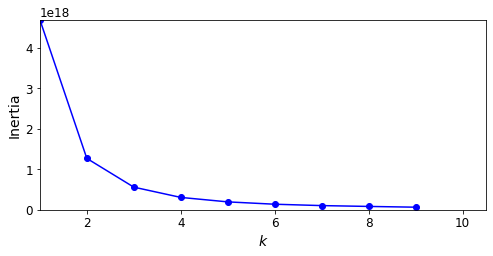

In [42]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5,10 , 4.696766482190248e+18])
plt.show()

In [39]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X)
print(kmeans.labels_)
print(kmeans.inertia_)

[1 0 0 ... 1 3 1]
3.056321765431808e+17


This looks good for now and I want to move on to the transaction data. We may need/want to just drop the late payment cols and try and merge the data together. 

# Transactions

In [53]:
trans.head()

,customer_id,Trans_date,Trans_time,Trans_tot_amount,merchant_id,Online_payment,Merch_loc_X,Merch_loc_Y,Spending_enc,Trans_type_AV,Trans_type_nan,Trans_currency_AMERIKAN_DOLARI,Trans_currency_EURO,Trans_currency_TURK_LIRASI
5604796,14490698,14FEB2015:00:00:00,13:09:13,20.0,27447333,0,40.98648,28.78267,31,1.0,0.0,0.0,0.0,1.0
5604797,18918853,07NOV2014:00:00:00,13:48:10,390.0,27447333,0,40.98648,28.78267,31,1.0,0.0,0.0,0.0,1.0
5604798,18918853,05MAY2015:00:00:00,17:03:02,285.0,27447333,0,40.98648,28.78267,31,1.0,0.0,0.0,0.0,1.0
5604799,22580054,23DEC2014:00:00:00,13:37:10,150.0,27447333,0,40.98648,28.78267,31,1.0,0.0,0.0,0.0,1.0
5604800,18918853,23DEC2014:00:00:00,13:36:14,465.0,27447333,0,40.98648,28.78267,31,1.0,0.0,0.0,0.0,1.0


In [64]:
#trans = trans.drop(['Trans_time'],axis=1)
trans = trans.drop(['Trans_date'],axis=1)

In [48]:
anyna = trans.isna().any()

In [50]:
trans['Merch_loc_Y'].isna().sum()/trans['Merch_loc_Y'].sum()*100

5.155948581948911

3-5% na vals

In [51]:
trans = trans.dropna()


In [65]:
from sklearn.cluster import KMeans
X = trans.to_numpy()
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
max(inertias)

9.57039904206579e+21

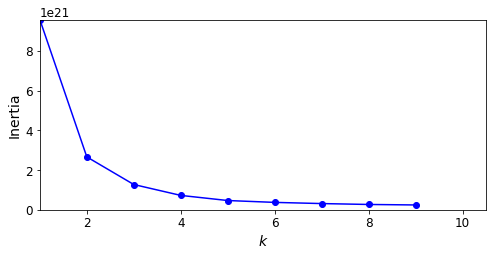

In [66]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5,10 , 9.57039904206579e+21])
plt.show()

In [67]:
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit_predict(X)
print(kmeans.labels_)
print(kmeans.inertia_)

[0 0 0 ... 3 3 3]
7.237375243351223e+20


all good to see that it is working with the same number of dems now just need to fix the date col and try to merge data sets. 

In [ ]:
demos = demos.drop([])